In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from random import sample
from scipy.stats import multivariate_normal

In [8]:
s1=1
s2=3
mu1 = [1, 5]
cov1 = s1*np.identity(2)
mu2 = [7, 0.3]
cov2 = s2*np.identity(2)
tamaño=15
X1 = multivariate_normal.rvs(mu1, cov1, size=tamaño)
X2 = multivariate_normal.rvs(mu2, cov2, size=tamaño)
X=np.vstack([X2,X1])
n=tamaño*2

#X1 = np.random.randint(10,25,(5,2)) 
#X2 = np.random.randint(55,70,(18,2)) 

X=np.vstack([X1,X2])

<function matplotlib.pyplot.show(*args, **kw)>

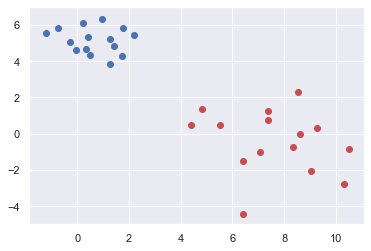

In [9]:
n=np.shape(X)[0]
#plt.scatter(np.array(X2[:,0]).reshape(n),np.array(X1[:,1]).reshape(n),c="r")
#plt.scatter(np.array(X1[:,0]).reshape(n),np.array(X2[:,1]).reshape(n),c="b")
#plt.scatter(np.array(X3[:,0]).reshape(n),np.array(X3[:,1]).reshape(n),c="g")
plt.scatter(X2[:,0],X2[:,1],c="r")
plt.scatter(X1[:,0],X1[:,1],c="b")
#plt.scatter(np.array(X[:,0]).reshape(n),np.array(X[:,1]).reshape(n))
plt.show

In [728]:
def kernel(X):
    n=np.shape(X)[0]
    K=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i,j]=np.exp((-(pow(np.linalg.norm(X[i]-X[j]),2)))/(2*pow(np.std(X),2)))
    return K

def centroides(X,k,iteracion,distancias=0):
    n=np.shape(X)[0]
    if iteracion == 1:
        return X[sample([x for x in range(n)],k)]
    else:
        centroides=np.zeros((k,2))
        for j in range(k):
            centroides[j]=np.array(asigna_cluster(X,dist,iteracion,k)[asigna_cluster(X,dist,iteracion,k)['Cluster'] == j][[0,1]].sum())/(asigna_cluster(X,dist,iteracion,k)[asigna_cluster(X,dist,iteracion,k)['Cluster'] == j][[0]]).shape[0]
        return centroides
    
def Distancias(X,centroides,k,iteracion):
    n=np.shape(X)[0]
    distancias=np.zeros((n,k))
    if(iteracion==1):
        for j in range(k):
            for i in range(n):
                distancias[i,j]=2*(1-np.exp((-pow(np.linalg.norm(X[i]-centroides[j]),2))/(2*pow(np.std(X),2))))  
        return distancias
    else:
        for j in range(k):
            for i in range(n):
                indices=asigna_cluster(X,dist,1,2).index[asigna_cluster(X,dist,1,2)['Cluster'] == j]
                K=kernel(X)
                aux=np.array(indices).astype(int)
                a=0
                for l in aux:
                    a=a+sum(K[aux,l])
                distancias[i,j]=K[i,j]-2*sum(K[i,aux])/7+a/7**2
        return distancias
    
def asigna_cluster(X,distancias,iteracion,k):
    X=pd.DataFrame(X)
    distancias=pd.DataFrame(distancias)
    cluster=pd.DataFrame(distancias.idxmin(axis=1))
    #print(cluster)
    distancias.columns=['Distancia al centroide {}'.format(i) for i in range(k)]
    cluster.columns=['Cluster {}'.format(iteracion)]
    cluster.columns=['Cluster']
    distancias_asignacion=pd.concat([X,distancias,cluster],axis=1)
    return distancias_asignacion

In [733]:
def kernel_kmeans(X,k,iter_max):
    dist=0
    n=np.shape(X)[0]
    for iteracion in range(iter_max):
        iteracion = iteracion + 1
        cent=centroides(X,k,iteracion,dist)
        clusters=asigna_cluster(X,Distancias(X,cent,k,iteracion),iteracion,k)
        labels=clusters["Cluster"].to_numpy()
        dist = Distancias(X,cent,k,iteracion)
        plt.scatter(np.array(X[:,0]).reshape(n),np.array(X[:,1]).reshape(n),c=labels, cmap='viridis')
        plt.scatter(np.array(cent[:,0]).reshape(k),np.array(cent[:,1]).reshape(k),c="#da6248",marker="d",s=150)
        plt.title("Kernel K-means Iteración"+str(iteracion))
        plt.show()
    return cent

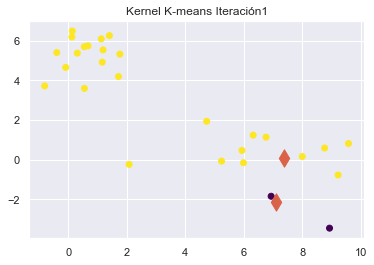

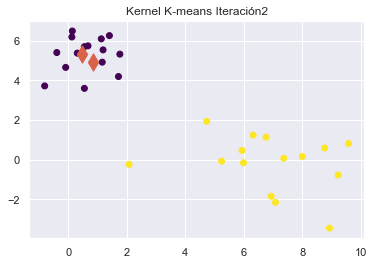

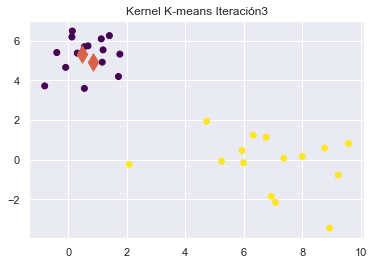

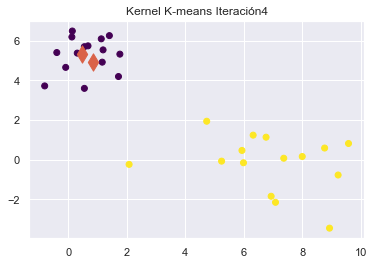

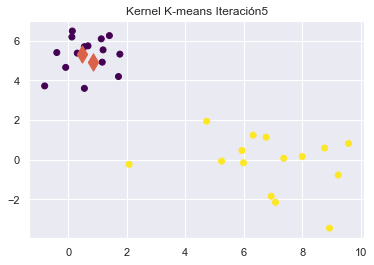

array([[0.46519997, 5.30942306],
       [0.84402905, 4.91251535]])

In [760]:
kernel_kmeans(X,2,5)

In [769]:
#n es el numero de datos

#Reescribiendo \gamma=a/b

def cluster_mmg(X,w,mu,sigma,num_iter,K,n):
    #Responsabilidades
    gamma=np.zeros((K,n))
    #Inicializamos el loop de actualizacion
    mu_new=mu
    for j in range(num_iter):
        X=np.vstack([X1,X2])
        a=np.zeros((K,n))
        b=[]
        #Para calcular Gamma_i^k
        for i in range(n):
            for k in range(K):
                a[k][i]=w[k]*multivariate_normal.pdf(X[i,:],
                            mean=mu_new[k,:], cov=sigma[k,:,:],allow_singular=True)
            b.append(sum(a[:,i]))
        gamma=a/b

        #Para actualizar mu
        #mu_new=np.zeros((np.shape(mu)[0],np.shape(mu)[1]))
        log_verosim=0
        for k in range(K):
            mu_new[:,k]=gamma[k]@X/sum(gamma[k,:])
            log_verosim+=np.log(sum(gamma[k,:]))
        mu_new=mu_new.T
        #Para calcular Gamma_i^k
        aux=0
        sigma_new=[]
        X=np.array([X1,X2])
        for k in range(K):
            for i in range(n):
                aux+=gamma[k,i]*((X[k]-mu[k]).T@(X[k]-mu[k]))
            sigma_new.append(aux/sum(gamma[k,:]))
        print('Iteración', j + 1, ', estimador de maxima log-verosimilitud: ', log_verosim)
    #print("mu_new")
    #print(np.around(mu_new,4))
    #print("Sigma_new")
    #print(np.around(sigma_new,4))
    #print("Responsabilidades:")
    #print(np.around(gamma,2))
    labels=np.around(gamma,0)
    return(labels)

Iteración 1 , estimador de maxima log-verosimilitud:  5.4161003571516275
Iteración 2 , estimador de maxima log-verosimilitud:  5.416100348672893
Iteración 3 , estimador de maxima log-verosimilitud:  5.416100348639297
Iteración 4 , estimador de maxima log-verosimilitud:  5.416100348639157
Iteración 5 , estimador de maxima log-verosimilitud:  5.416100348639156


Text(0.5, 1.0, 'MMG-EM clustering, implementación')

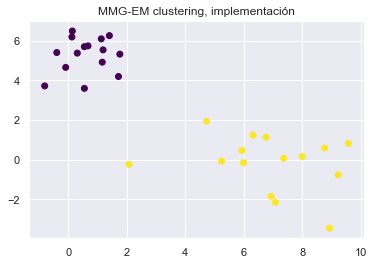

In [778]:
w=np.array([0.2,0.8])
mu=np.array([mu1,mu2])
sigma=np.array([cov1,cov2])
labels=cluster_mmg(X,w,mu,sigma,5,2,n)
plt.scatter(X[:,0],X[:,1],c=labels[1], cmap='viridis')
plt.title("MMG-EM clustering, implementación")

Text(0.5, 1.0, 'Fuzzy K-means')

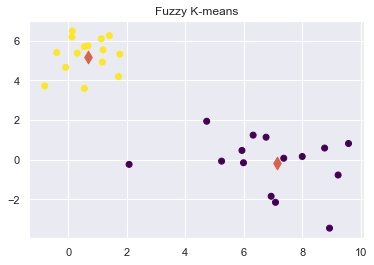

In [782]:
from sklearn_extensions.fuzzy_kmeans import FuzzyKMeans
fuzzy_kmeans = FuzzyKMeans(k=2, m=2)
fuzzy_kmeans=fuzzy_kmeans.fit(X)
fuzzy_labels=fuzzy_kmeans.labels_
cent=fuzzy_kmeans.cluster_centers_
#res = pd.DataFrame(np.round(fuzzy_kmeans.fuzzy_labels_,3)).assign(label=fuzzy_kmeans.labels_)
plt.scatter(X[:, 0], X[:, 1], c=fuzzy_labels, cmap='viridis')
plt.scatter(cent[:,0],cent[:,1],c="#da6248",marker="d",s=80)
plt.title("Fuzzy K-means")